In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split

In [2]:
t = pd.read_csv('insurance.csv')
t

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

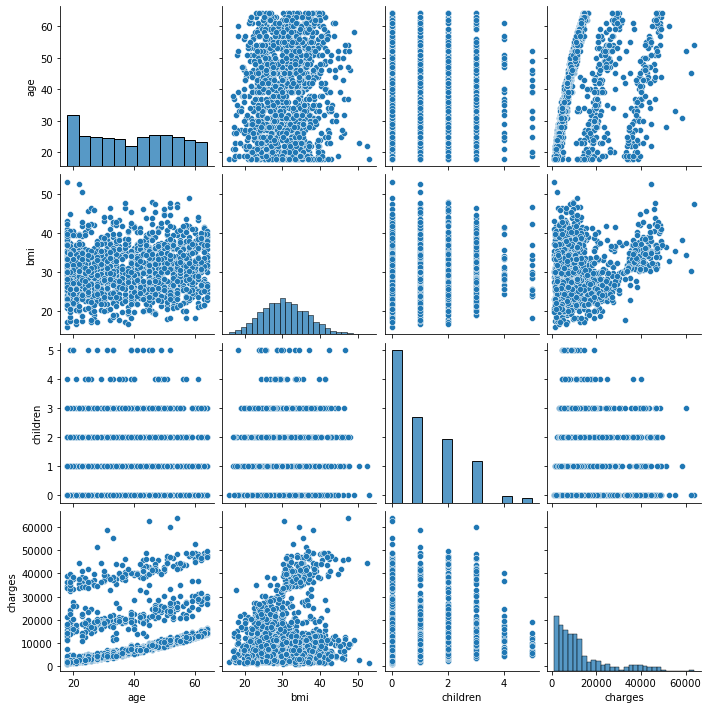

In [3]:
sn.pairplot(t)

In [4]:
t.corr()


age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

<AxesSubplot:>

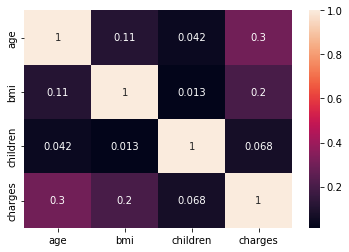

In [5]:
sn.heatmap(t.corr(), annot = True)

In [6]:
#seperate depwndent and independent variables
x = t[['age', 'bmi']]#.to_numpy().reshape(-1,1)
y = t['charges']#.to_numpy().reshape(-1,1)

In [7]:
x_train, x_test, y_train, y_test, = train_test_split(x,y, train_size = 0.75, random_state = 123)
x_train.shape

(1003, 2)

In [8]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [9]:
model.intercept_

-8334.674290358813

In [10]:
model.coef_

array([261.25257378, 370.0346051 ])

In [11]:
y_pred = model.predict(x_test)
y_pred

array([20259.77877073, 13840.65005216, 10338.23180197,  9738.10081313,
       16865.1708719 , 15148.12887843,  5714.64941122,  7132.30083884,
        9908.95094715, 13285.38281892, 12851.56383788, 18774.88689851,
       18869.96136428,  9415.33292652, 17463.8298649 , 11440.63817379,
       21207.86442706,  6105.33267098, 14916.39764725, 16573.01814656,
       14940.90949957, 23316.30532177,  6678.17066742, 14800.9712782 ,
        4107.18651633, 14510.95371618, 20579.60266566, 12358.70217163,
       18452.91607917,  4187.08142071, 13597.64317015, 21461.71630874,
       10699.35300623,  9101.51915366, 11836.15631116, 17113.85041169,
       23883.25533485, 12548.0540359 , 15678.75035956, 15133.32749422,
       11123.46151916, 12756.15190783, 10479.51988048, 12779.1103385 ,
       10290.96508347,  7235.78838957, 17815.36273974, 18177.28101127,
       18805.24602129, 13508.75343912, 16609.76556858, 16417.42899973,
        9293.22150684, 16644.91885606, 20148.13417353, 11934.7157974 ,
      

In [12]:
# We can also test the model using a user-supplied input.
vol = float(input("Enter age: "))
wt = float(input("Enter bmi: "))
#m = pd.DataFrame([vol, wt])
L = [vol,wt]
t = pd.DataFrame([L], columns =['age', 'bmi'])
print ("Predict charges: ", model.predict(t) )

Enter age: 18
Enter bmi: 33.770
Predict charges:  [8863.94065202]


[Text(0, 0.5, 'predicted charges'), Text(0.5, 0, 'Features (age, bmi) ')]

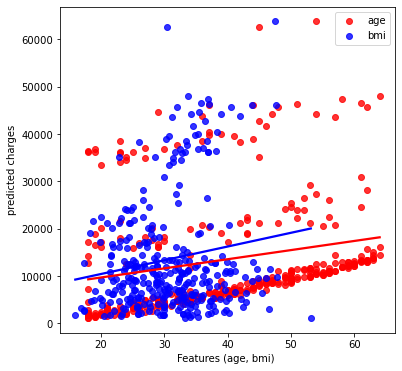

In [13]:
# plot multiple regression plots using seaborn's regplot()
fig, ax = plt.subplots(figsize=(6, 6))
sn.regplot(x=x_test['age'], y=y_test, ci=None, color ='red',  label='age')
sn.regplot(x=x_test['bmi'], y=y_test, ci=None, color ='blue', label='bmi')
plt.legend()
ax.set(ylabel='predicted charges', xlabel='Features (age, bmi) ')